In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wine_data = pd.read_csv(r'C:\Users\user\DSA\Assignments\Assignment Unsupervised Learning\Wine_clust.csv')
wine_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


<AxesSubplot:xlabel='Magnesium', ylabel='Color_Intensity'>

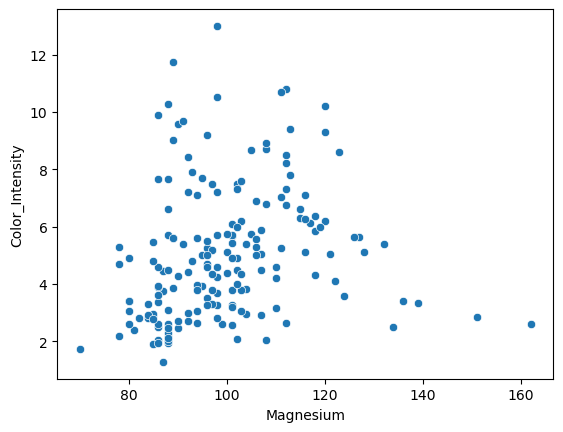

In [4]:
sns.scatterplot(x='Magnesium', y='Color_Intensity', data=wine_data)

# 1. K-Means Clustering

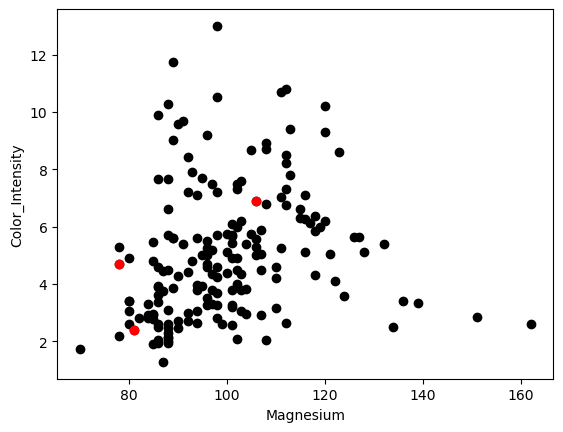

In [5]:
X = wine_data

# Assuming number of clusters
K = 3

# select random  observations  as centroids
Centroids = (X.sample(n=K))
plt.scatter(X['Magnesium'],X['Color_Intensity'],c='black')
plt.scatter(Centroids['Magnesium'],Centroids['Color_Intensity'], c='red')
plt.xlabel('Magnesium')
plt.ylabel('Color_Intensity')
plt.show()

In [6]:
from sklearn.cluster import KMeans

# fit a K-means model
kmeans = KMeans(n_clusters=K,random_state = 0)
X['cluster'] = kmeans.fit_predict(X[['Magnesium','Color_Intensity']])

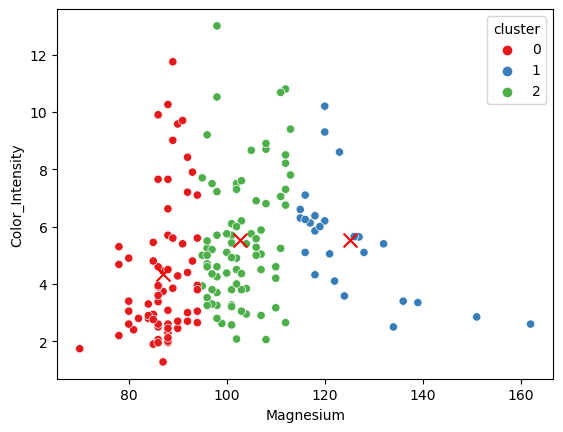

In [7]:
# get cluster centroids

centroids = kmeans.cluster_centers_

sns.scatterplot(data=X, x="Magnesium", y='Color_Intensity', hue='cluster', palette='Set1')
plt.scatter(centroids[:,0], centroids[:,1],c='red',marker='x',s=100)
plt.xlabel('Magnesium')
plt.ylabel('Color_Intensity')
plt.show()

In [8]:
# Get the inertia (within-cluster sum of squares)
inertia = kmeans.inertia_
inertia

7993.100709085303

Finding optimum k-value using Elbow Method

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


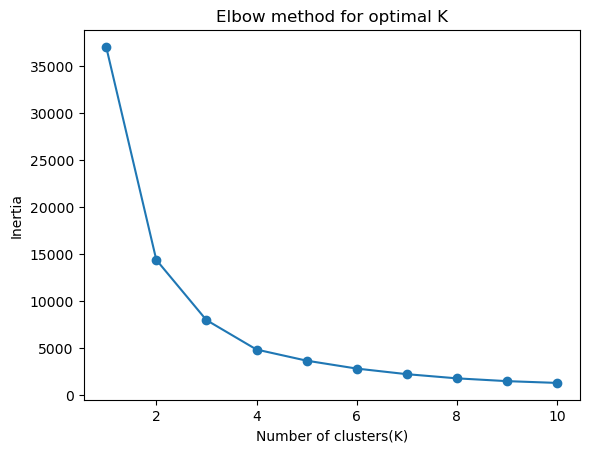

In [9]:
# define a range of K values to test
K_range = range(1,11)
inertia_values = []

# Calculate the inertia for different values of K
for K in K_range:
    kmeans = KMeans(n_clusters=K,random_state = 0)
    kmeans.fit(X[['Magnesium','Color_Intensity']])
    inertia = kmeans.inertia_
    inertia_values.append(inertia)
 
# Plot the inertia values
plt.plot(K_range,inertia_values, marker='o')
plt.title('Elbow method for optimal K')
plt.xlabel('Number of clusters(K)')
plt.ylabel('Inertia')
plt.show()

From the figure, we can decide that optimal k-value = 5.

Now creating the K-Means clustering model with k=5.

In [10]:
from sklearn.cluster import KMeans
K = 5

# fit a K-means model
kmeans = KMeans(n_clusters=K,random_state = 0)
X['cluster'] = kmeans.fit_predict(X[['Magnesium','Color_Intensity']])

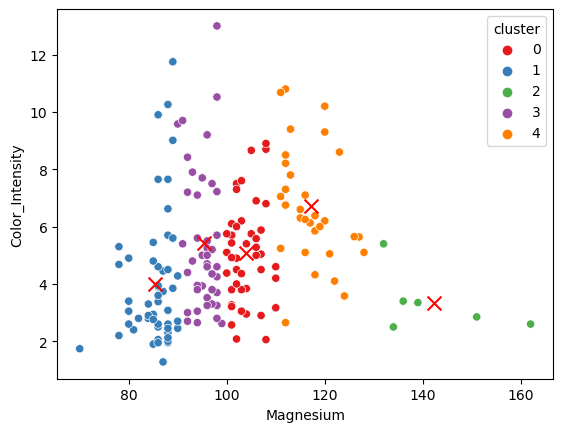

In [11]:
# get cluster centroids

centroids = kmeans.cluster_centers_

sns.scatterplot(data=X, x="Magnesium", y='Color_Intensity', hue='cluster', palette='Set1')
plt.scatter(centroids[:,0], centroids[:,1],c='red',marker='x',s=100)
plt.xlabel('Magnesium')
plt.ylabel('Color_Intensity')
plt.show()

In [12]:
inertia = kmeans.inertia_
inertia

3673.5024378099097

Evaluating the algorithm using silhouette score

In [13]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X[['Magnesium','Color_Intensity']],X['cluster'])
silhouette_avg

0.4633602763637591

# 2. Agglomerative Clustering

In [14]:
X = wine_data[['Magnesium','Color_Intensity']]
X.head()

,Magnesium,Color_Intensity
0,127,5.64
1,100,4.38
2,101,5.68
3,113,7.80
4,118,4.32


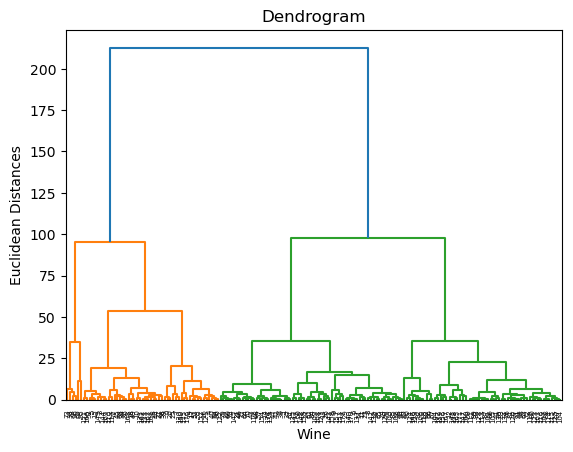

In [15]:
# using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Wine')
plt.ylabel('Euclidean Distances')
plt.show()

In [16]:
# Fitting  Hierarchial Clustering  to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

In [17]:
y_hc

array([0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 1, 2, 2,
       0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 1, 2, 2, 2, 1, 2, 2,
       1, 1, 0, 0, 2, 1, 1, 0, 2, 2, 1, 0, 0, 2, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2,
       0, 1, 2, 1, 1, 1, 1, 0, 1, 1, 2, 0, 2, 1, 1, 1, 1, 2, 1, 1, 0, 0,
       2, 0, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 0, 2, 1, 1, 2, 0, 0, 0, 0, 2,
       2, 2, 1, 2, 2, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 1, 1, 2, 2, 0,
       0, 2], dtype=int64)

In [18]:
X_np = X.values

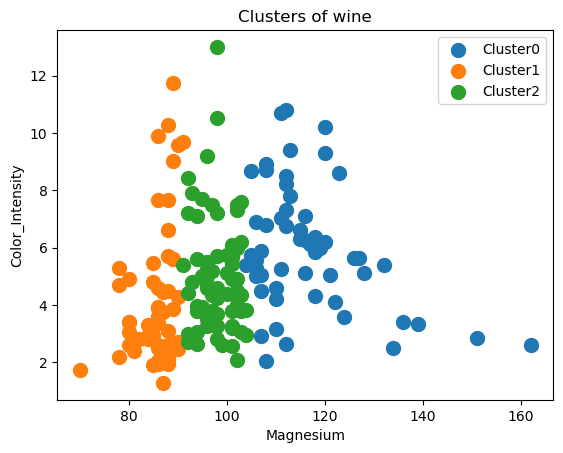

In [19]:
# Visualising the clusters
# Assuming y_hc contains cluster labels, e.g. 0,1,2

for cluster_label in range(3):
    plt.scatter(X_np[y_hc ==cluster_label,0 ],X_np[y_hc ==cluster_label,1], s=100, label=f'Cluster{cluster_label}')
plt.title('Clusters of wine')
plt.xlabel('Magnesium')
plt.ylabel('Color_Intensity')
plt.legend()
plt.show()

# 3. DBSCAN clustering

In [20]:
from sklearn.cluster import DBSCAN

In [21]:
X = wine_data[['Magnesium','Color_Intensity']]
X.head()

,Magnesium,Color_Intensity
0,127,5.64
1,100,4.38
2,101,5.68
3,113,7.80
4,118,4.32


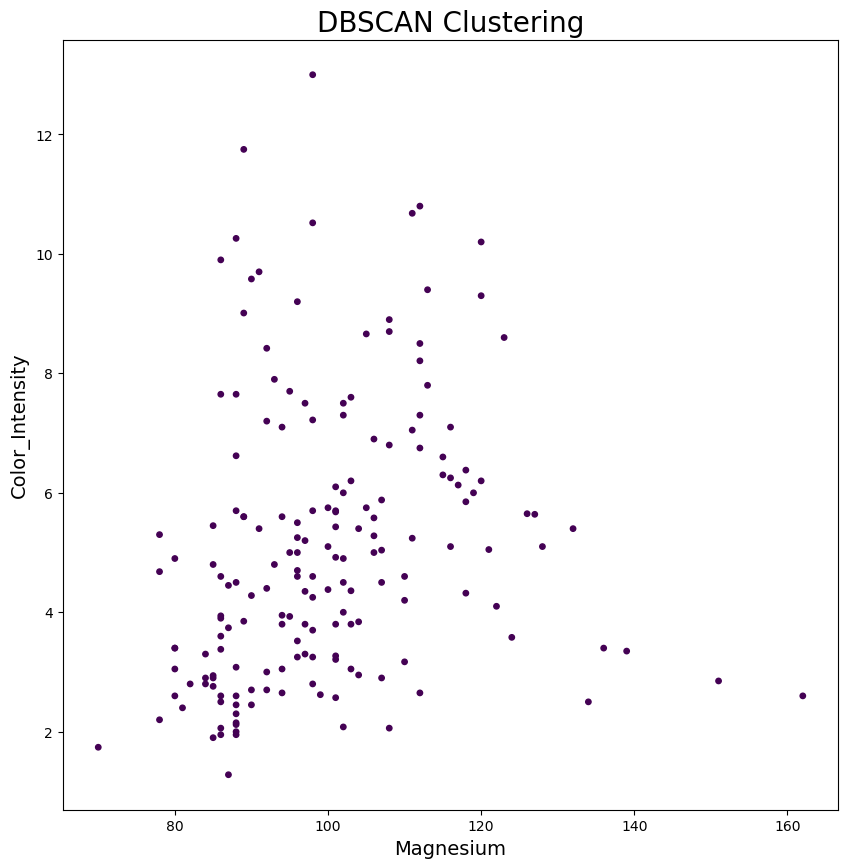

In [22]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)

wine_data['DBSCAN_labels']=db.labels_ 

plt.figure(figsize=(10,10))
#colors = ['y', 'b', 'g', 'r']
plt.scatter(wine_data['Magnesium'],wine_data['Color_Intensity'],c=wine_data['DBSCAN_labels'],s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Magnesium',fontsize=14)
plt.ylabel('Color_Intensity',fontsize=14)
plt.show()


All datapoints are in same color because they are treated as noise. This is because the 'eps' parameter is very low.

To find the optimum values for eps, we plot the K-distance Graph

In [23]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(wine_data[['Magnesium','Color_Intensity']])
distances, indices = nbrs.kneighbors(wine_data[['Magnesium','Color_Intensity']])

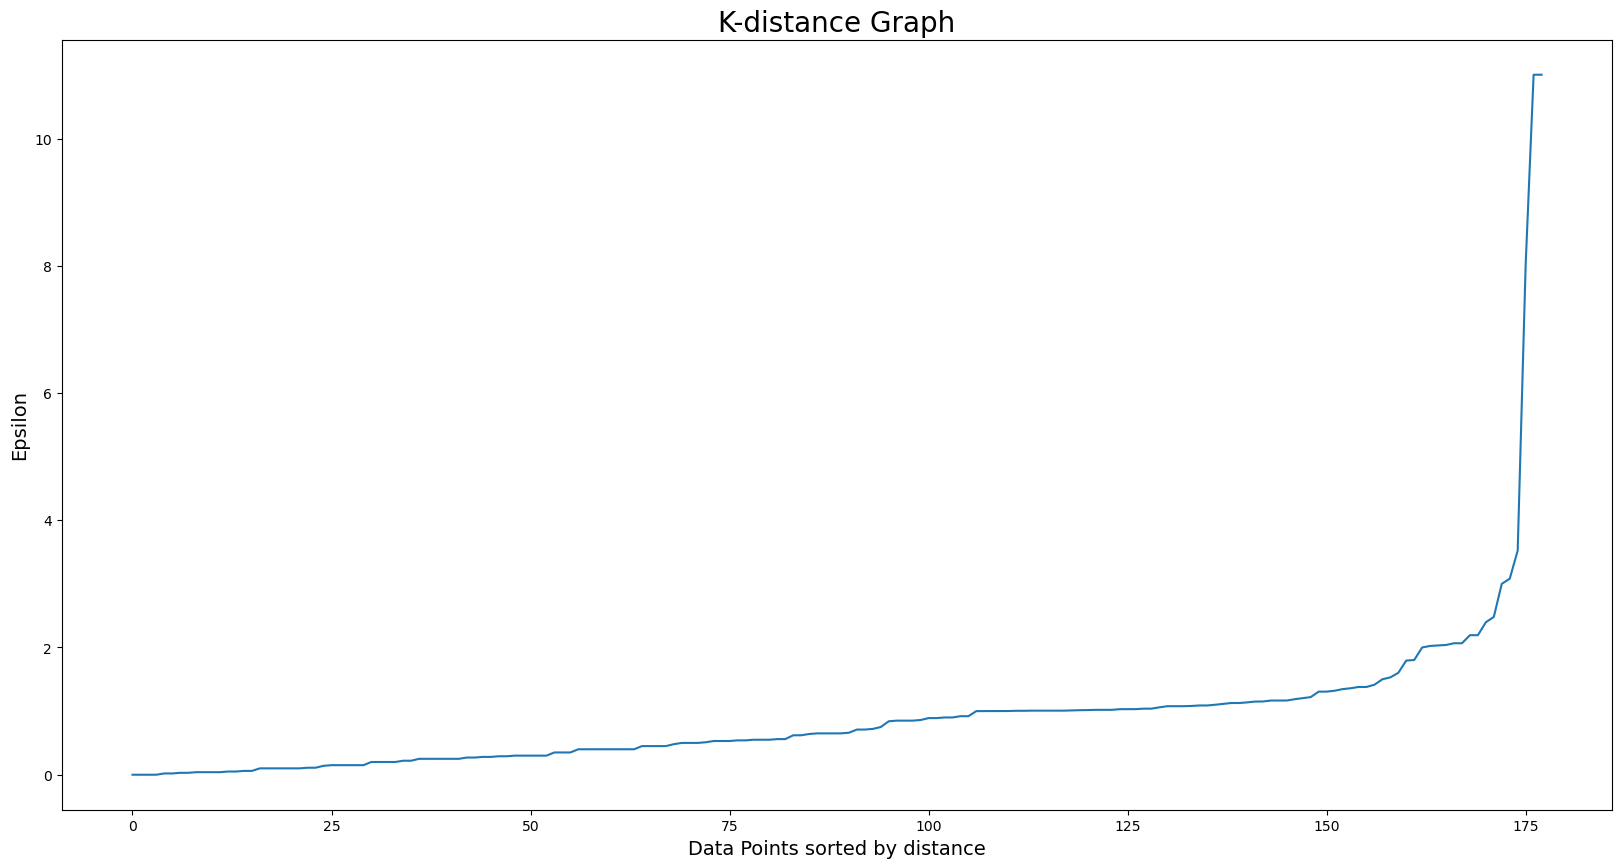

In [24]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

The optimum value of epsilon is at the point of maximum curvature in the K-Distance Graph, which is 3 in this case. 

In [25]:
dbscan_opt=DBSCAN(eps=3,min_samples=10)
dbscan_opt.fit(wine_data[['Magnesium','Color_Intensity']])

DBSCAN(eps=3, min_samples=10)

In [26]:
wine_data['DBSCAN_opt_labels']=dbscan_opt.labels_
wine_data['DBSCAN_opt_labels'].value_counts()

 0    131
-1     37
 1     10
Name: DBSCAN_opt_labels, dtype: int64

Here 0 and 1 are the clusters and -1 is the noise

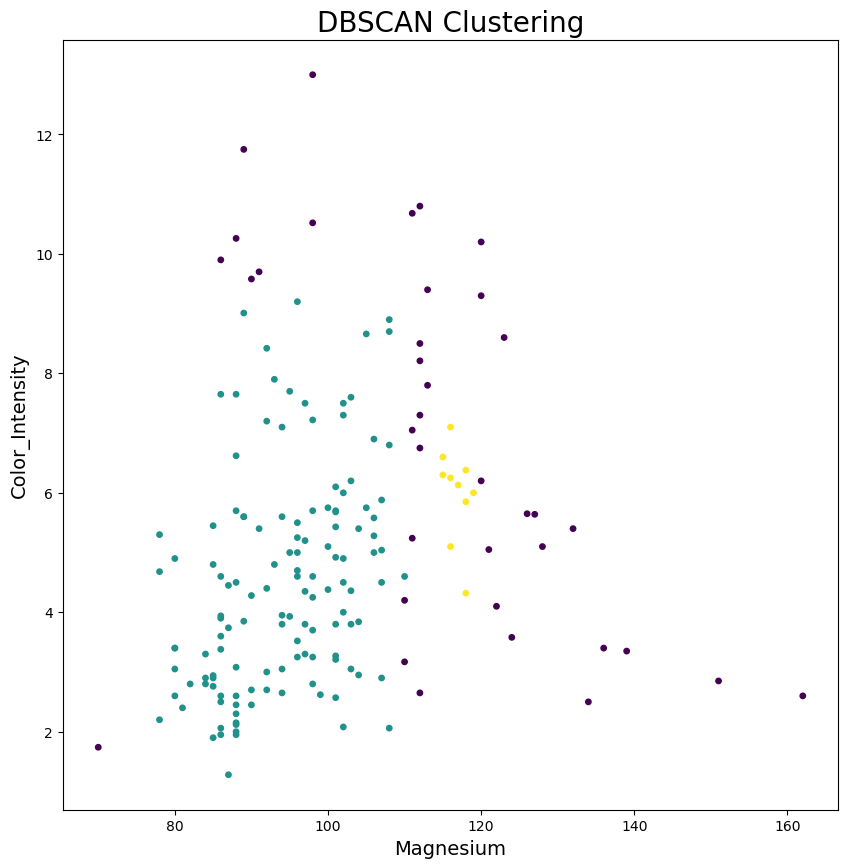

In [27]:
# Plotting the resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(wine_data['Magnesium'],wine_data['Color_Intensity'],c=wine_data['DBSCAN_opt_labels'],s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Magnesium',fontsize=14)
plt.ylabel('Color_Intensity',fontsize=14)
plt.show()

Clustered the data points into two clusters (green and yellow), and it also detected noise in the dataset represented by the purple color

Evaluating the model using silhouette score:

In [28]:
from sklearn import metrics
sc = metrics.silhouette_score(X, dbscan_opt.labels_)
print("Silhouette Coefficient:%0.2f" % sc)

Silhouette Coefficient:0.30
